# 7. Introduction to model evaluation

In [2]:
import pandas as pd

# Load the data into a Pandas DataFrame
train_df = pd.read_csv("c3_train_df.csv")
train_df.head()

,temp,users
0,0.5400,884
1,0.7942,662
2,0.4875,830
3,0.4350,1192
4,0.4358,259


__Compute the baseline__

In [4]:
import numpy as np

# Extract the target
y_train = train_df.users.values

# Compute baseline
pred_baseline = np.mean(y_train)  
pred_baseline

695.2582781456954

In [5]:
# Load test data
test_df = pd.read_csv("c3_three-models.csv")
test_df.head()

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52
2,0.1727,25,178,66,55
3,0.1775,75,185,72,57
4,0.1822,74,192,78,60


In [6]:
# Mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

# Extract the target
y_test = test_df.users.values

# compare the baseline with the target from the test data
mae_baseline = MAE(y_test, pred_baseline)
mae_baseline 

316.3029253102934

In [7]:
# Vector with predictions from the baseline
pred_baseline = np.full_like(y_test, fill_value=np.mean(y_train), dtype=float)
pred_baseline

array([695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25827815,
       695.25827815, 695.25827815, 695.25827815, 695.25

In [8]:
print(len(pred_baseline), len(y_test))

151 151


In [9]:
from sklearn.dummy import DummyRegressor

# Create the DummyRegressor object
dummy = DummyRegressor(strategy="mean")

In [10]:
# Extract the features
x_train = train_df.temp.values

# Fit the estimator
dummy.fit(x_train[:, np.newaxis], y_train)

DummyRegressor()

In [11]:
# Extract the features
x_test = test_df.temp.values

# Vector with predictions from the baseline
pred_baseline = dummy.predict(x_test[:, np.newaxis])

# compare the baseline with the target from the test data
mae_baseline = MAE(y_test, pred_baseline)
mae_baseline  

316.3029253102934

__Compare models__

In [12]:
test_df.head()

,temp,users,pred_lr,pred_poly3,pred_huber3
0,0.1508,41,146,44,51
1,0.1609,54,161,53,52
2,0.1727,25,178,66,55
3,0.1775,75,185,72,57
4,0.1822,74,192,78,60


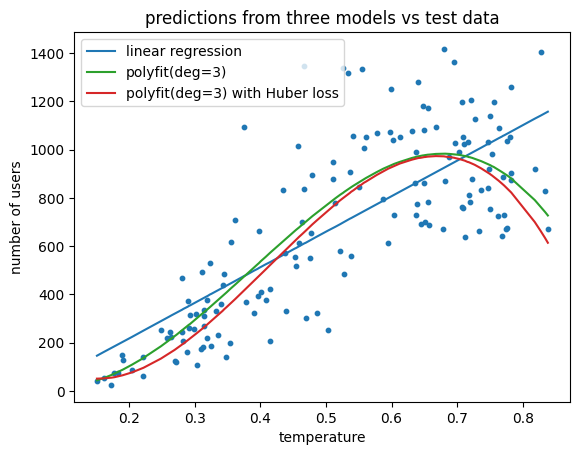

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract variables
x_test = test_df.temp.values

# Plot the models
plt.scatter(x_test, y_test, s=10)
plt.plot(x_test, test_df.pred_lr, c="C0", label="linear regression")
plt.plot(x_test, test_df.pred_poly3, c="C2", label="polyfit(deg=3)")
plt.plot(x_test, test_df.pred_huber3, c="C3", label="polyfit(deg=3) with Huber loss")

plt.title('predictions from three models vs test data')
plt.xlabel('temperature')
plt.ylabel('number of users')
plt.legend(loc='upper left')
plt.show()

In [14]:
# Root mean squared error
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred))  # MSE
    return np.sqrt(mse)  # RMSE


rmse_baseline = RMSE(y_test, pred_baseline)
rmse_lr     = RMSE(y_test, test_df.pred_lr)
rmse_poly3  = RMSE(y_test, test_df.pred_poly3)
rmse_huber3 = RMSE(y_test, test_df.pred_huber3)

# Print values
print("baseline:", rmse_baseline)
print("linear regression:", rmse_lr)
print("polyfit(deg=3):", rmse_poly3)
print("polyfit(deg=3) with huber loss:", rmse_huber3)

baseline: 371.6823731957837
linear regression: 232.53050786099598
polyfit(deg=3): 210.55145192395318
polyfit(deg=3) with huber loss: 215.66518077491205


Let’s change the cost function to the __mean absolute error (MAE)__:

In [15]:
mae_baseline = MAE(y_test, pred_baseline)
mae_lr     = MAE(y_test, test_df.pred_lr)
mae_poly3  = MAE(y_test, test_df.pred_poly3)
mae_huber3 = MAE(y_test, test_df.pred_huber3)

# Print values
print("baseline:", mae_baseline)
print("linear regression:", mae_lr)
print("polyfit(deg=3):", mae_poly3)
print("polyfit(deg=3) with huber loss:", mae_huber3)

baseline: 316.3029253102934
linear regression: 186.58278145695365
polyfit(deg=3): 161.71523178807948
polyfit(deg=3) with huber loss: 164.75496688741723


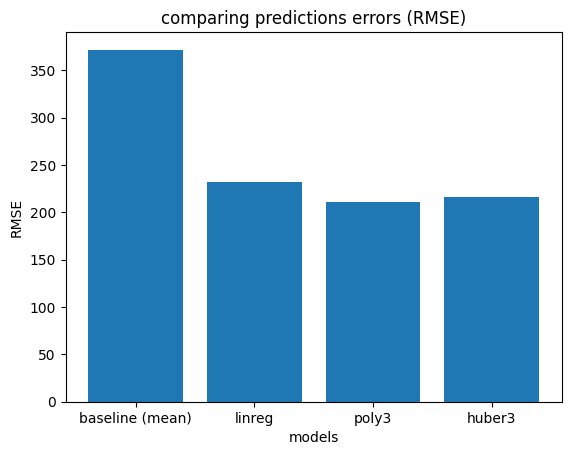

In [16]:
# Bar chart
plt.bar([1, 2, 3, 4], [rmse_baseline, rmse_lr, rmse_poly3, rmse_huber3])
plt.xticks([1, 2, 3, 4], ["baseline (mean)", "linreg", "poly3", "huber3"])
plt.title('comparing predictions errors (RMSE)')
plt.xlabel('models')
plt.ylabel('RMSE')
plt.show()

In practice, data sets usually have several features, and it’s difficult to visually “see” how well our models actually fit the data. For this reason, setting a baseline and comparing many different models can help in two ways:

    1. To verify that our code works, i.e., a model that performs worse than the baseline is a sign that something might be wrong.
    2. To choose an appropriate model, i.e., the model with the best accuracy isn’t necessarily the most appropriate one. We might consider other aspects such as speed and interpretability of the model.


# 8. The train-validate-test paradigm

# 9. Exercise - Bike sharing model evaluation

Load the train/test sets into the `train_df`/`test_df` DataFrames. Create the x/y Numpy arrays from the `temp` and `casual` users columns. Plot the data points.

In [17]:
import pandas as pd
import os

# Load datasets
train_df = pd.read_csv("c3_bike-train.csv")
test_df = pd.read_csv("c3_bike-test.csv")

# Create x/y Numpy arrays
x_tr = train_df.temp.values
y_tr = train_df.casual.values

x_te = test_df.temp.values
y_te = test_df.casual.values

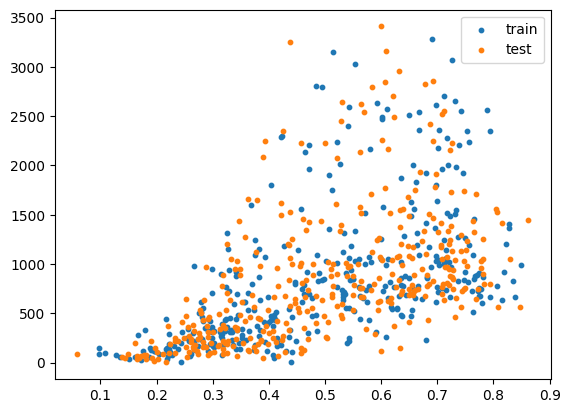

In [18]:
# Plot data points
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x_tr, y_tr, label="train", s=10)
plt.scatter(x_te, y_te, label="test", s=10)
plt.legend()
plt.show()

(A) Fit several models to the train data and evaluate their performance on the test set using MAE. (B) Remove the outliers with the z-scores. (C) Create a baseline model and do a final model comparison using a bar chart.

Some ideas: Linear regression, polyfit with different degrees, linear regression with Huber loss, linear regression without outliers, polyfit without outliers.

In [19]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

MAE linear regression: 408.868
MAE polyfit(deg=3): 403.821
MAE Huber: 383.736


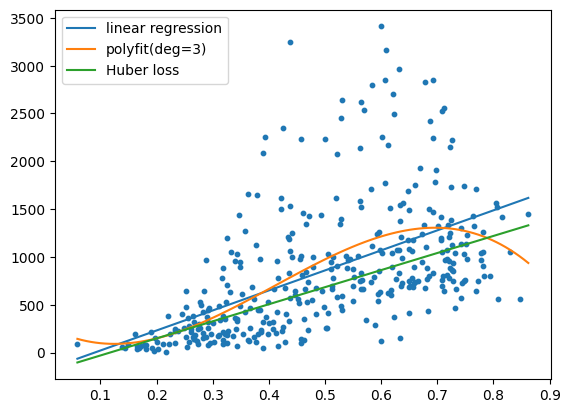

In [21]:
import numpy as np

# (A) Test different models
# * Linear regression
coefs_lr = np.polyfit(x_tr, y_tr, deg=1)  # Fit to train data
y_pred_lr = np.polyval(coefs_lr, x_te)  # Predictions for test data points
mae_lr = MAE(y_te, y_pred_lr)  # MAE of predictions
# Print performance on test set
print("MAE linear regression: {:.3f}".format(mae_lr))

# * Polyfit with degree 3
coefs_poly3 = np.polyfit(x_tr, y_tr, deg=3)  # Fit to train data
y_pred_poly3 = np.polyval(coefs_poly3, x_te)  # Predictions for test data points
mae_poly3 = MAE(y_te, y_pred_poly3)  # MAE of predictions
print("MAE polyfit(deg=3): {:.3f}".format(mae_poly3))

# * Huber loss
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1.1)  # Create object
huber.fit(x_tr[:, np.newaxis], y_tr)  # Fit it to train data
y_pred_huber = huber.predict(x_te[:, np.newaxis])  # Predictions for test data points
mae_huber = MAE(y_te, y_pred_huber)  # MAE of predictions
print("MAE Huber: {:.3f}".format(mae_huber))

# Plot the prediction curves
# Generate a hundred points
x_values = np.linspace(min(x_te), max(x_te), num=100)

# and the predictions
y_values_lr = np.polyval(coefs_lr, x_values)
y_values_poly3 = np.polyval(coefs_poly3, x_values)
y_values_huber = huber.predict(x_values[:, np.newaxis])

# Plot them
plt.scatter(x_te, y_te, s=10)
plt.plot(x_values, y_values_lr, label="linear regression")
plt.plot(x_values, y_values_poly3, label="polyfit(deg=3)")
plt.plot(x_values, y_values_huber, label="Huber loss")
plt.legend()
plt.show()

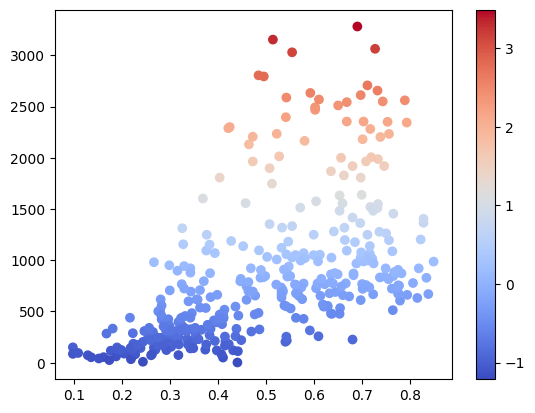

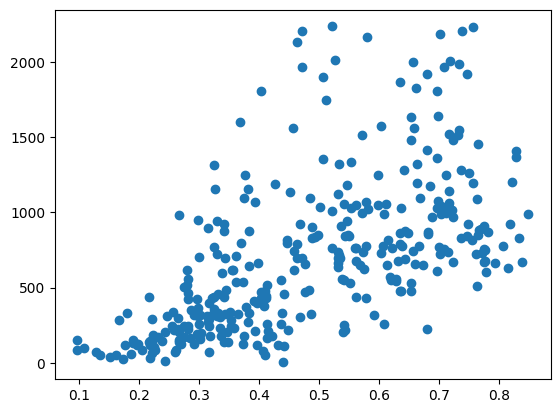

In [22]:
# (B) Remove outliers
# Compute z-scores
z_scores = (y_tr - np.mean(y_tr)) / np.std(y_tr)

# Plot them
plt.scatter(x_tr, y_tr, c=z_scores, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

# Detect "extreme" data points
# 2 standard deviations away form the mean
idx = np.abs(z_scores) < 2

# Remove them
x_tr2, y_tr2 = x_tr[idx], y_tr[idx]

# Plot the remaining points
plt.scatter(x_tr2, y_tr2)
plt.show()

MAE linear regression 2: 390.524
MAE polyfit(deg=3) 2: 381.189


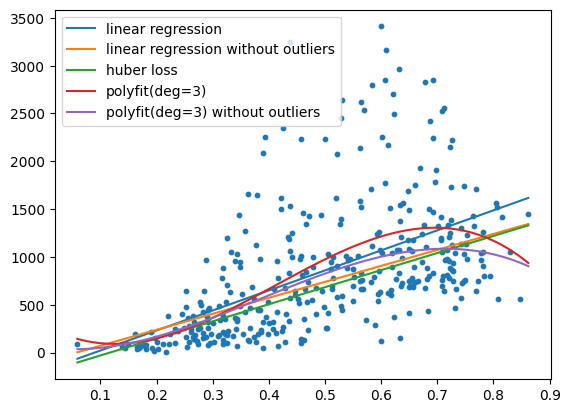

In [23]:
# Linear regression without outliers
coefs_lr2 = np.polyfit(x_tr2, y_tr2, deg=1)  # Fit to train data without outliers
y_pred_lr2 = np.polyval(coefs_lr2, x_te)  # Predictions for test data points
mae_lr2 = MAE(y_te, y_pred_lr2)  # MAE of predictions
print("MAE linear regression 2: {:.3f}".format(mae_lr2))

# Polyfit with degree 3
coefs_poly3_2 = np.polyfit(x_tr2, y_tr2, deg=3)  # Fit to train data without outliers
y_pred_poly3_2 = np.polyval(coefs_poly3_2, x_te)  # Predictions for test data points
mae_poly3_2 = MAE(y_te, y_pred_poly3_2)  # MAE of predictions
print("MAE polyfit(deg=3) 2: {:.3f}".format(mae_poly3_2))

# Predictions for the hundred x_values
y_values_lr2 = np.polyval(coefs_lr2, x_values)
y_values_poly3_2 = np.polyval(coefs_poly3_2, x_values)

# Plot all models
plt.scatter(x_te, y_te, s=10)
plt.plot(x_values, y_values_lr, label="linear regression")
plt.plot(x_values, y_values_lr2, label="linear regression without outliers")
plt.plot(x_values, y_values_huber, label="huber loss")
plt.plot(x_values, y_values_poly3, label="polyfit(deg=3)")
plt.plot(x_values, y_values_poly3_2, label="polyfit(deg=3) without outliers")
plt.legend()
plt.show()

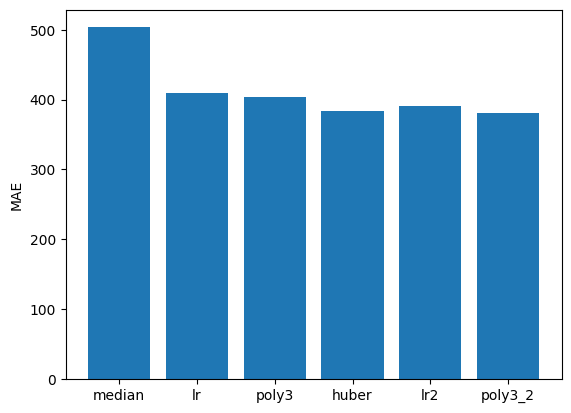

In [24]:
# (C) Final comparison
# Baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Bar plot
mae_values = [mae_baseline, mae_lr, mae_poly3, mae_huber, mae_lr2, mae_poly3_2]
titles = ["median", "lr", "poly3", "huber", "lr2", "poly3_2"]

xcor = np.arange(len(mae_values))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)

plt.ylabel("MAE")
plt.show()